### 1. Load Libraries

In [2]:
import pandas as pd
import seaborn as sns

### 2. Create Data Types for each Dataset

#### 2.1. Movies Industry - "movies.csv"

In [306]:
movies = pd.read_csv('./data/movies.csv')
movies = movies[(movies.gross!=0)&(movies.budget!=0)]
movies['isprofit'] = movies.apply(lambda x: 1 if x['gross']>x['budget'] else 0, axis = 1)
movies['profitability_ratio'] = movies.apply(lambda x: (x['gross']-x['budget'])/x['budget'], axis = 1)
movies['profitability_ratio_bucket'] = movies.profitability_ratio.apply(lambda x: int(round(x,1)*100))

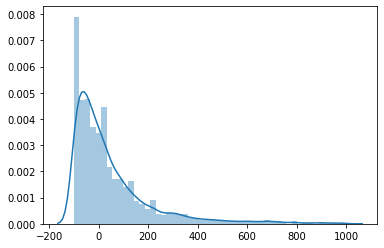

In [65]:
sns.distplot([e for e in movies.profitability_ratio_bucket if e <= 1000])

In [ ]:
movies_dtypes = pd.DataFrame(movies.dtypes, columns=['data_format'])
movies_dtypes['is_descriptive'] = [0,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0]
movies_dtypes['is_target'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0]
movies_dtypes['data_attribute'] = [
    "continuous",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
    "continuous",
    "categorical -> nominal",
    "categorical -> nominal",
    "continuous -> date",
    "continuous",
    "continuous",
    "categorical -> nominal",
    "discrete",
    "categorical -> nominal",
    "categorical -> ordinal",
    "categorical -> nominal -> binary",
    "continuous -> ratio-scaled",
    "continuous -> ratio-scaled",
]

In [294]:
movies_dtypes

,data_format,is_descriptive,is_target,data_attribute,example
budget,int64,0,0,continuous,8000000
company,object,0,0,categorical -> nominal,Columbia Pictures Corporation
country,object,1,0,categorical -> nominal,USA
director,object,1,0,categorical -> nominal,Rob Reiner
genre,object,1,0,categorical -> nominal,Adventure
gross,int64,0,0,continuous,52287414
name,object,1,0,categorical -> nominal,Stand by Me
rating,object,0,0,categorical -> nominal,R
released,object,1,0,continuous -> date,1986-08-22 00:00:00
runtime,int64,1,0,continuous,89


#### 2.2. The Movies Database - "metadata.csv"

In [306]:
metadata = pd.read_csv('./data/metadata.csv')

In [188]:
def convert_spoken_languages(value):
    try: return ', '.join([e['iso_639_1'] for e in json.loads(value.replace("'",'"').replace("/","").replace("\\","").replace("None", '"None"'))])
    except: return "NA"

In [268]:
def convert_production_countries(row):
    try: return ', '.join([e['iso_3166_1'] for e in json.loads(row.production_countries.replace("'",'"').replace("/","").replace("\\","").replace("None", '"None"').replace("nan", '"None"'))])
    except: return "NA"

In [275]:
metadata['genres_edited'] = metadata.genres.apply(lambda x: ', '.join([e['name'] for e in json.loads(x.replace("'",'"').replace("/","").replace("None", '"None"'))]))
metadata['spoken_languages_edited'] = metadata.spoken_languages.apply(convert_spoken_languages)
metadata['production_countries_edited'] = metadata.apply(convert_production_countries,axis=1)
metadata.production_countries_edited.replace('','NA',inplace=True)

In [303]:
metadata_dtypes = pd.DataFrame(metadata.dtypes, columns=['data_format'])
metadata_dtypes['is_descriptive'] = [1,0,0,1,1,0,1,1,1,1,1]
metadata_dtypes['is_target'] =        [0,0,0,0,0,0,0,0,0,0,0]
metadata_dtypes['data_attribute'] = [
    "categorical -> nominal -> binary",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
    "continuous",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
    "categorical -> nominal",
]

In [304]:
metadata_dtypes

,data_format,is_descriptive,is_target,data_attribute
adult,object,1,0,categorical -> nominal -> binary
id,object,0,0,categorical -> nominal
imdb_id,object,0,0,categorical -> nominal
original_title,object,1,0,categorical -> nominal
overview,object,1,0,categorical -> nominal
popularity,float64,0,0,continuous
tagline,object,1,0,categorical -> nominal
title,object,1,0,categorical -> nominal
genres_edited,object,1,0,categorical -> nominal
spoken_languages_edited,object,1,0,categorical -> nominal


#### 2.2. The Movies Database - "keywords.csv"

In [306]:
keywords = pd.read_csv('./data/keywords.csv')

In [328]:
def convert_keywords(row):
    return ', '.join([e['name'] for e in eval(row.keywords)])

In [329]:
keywords['keywords_edited'] = keywords.apply(convert_keywords,axis=1)

In [335]:
keywords_dtypes = pd.DataFrame(keywords.dtypes, columns=['data_format'])
keywords_dtypes['is_descriptive'] = [0,1]
keywords_dtypes['is_target'] = [0,0]
keywords_dtypes['data_attribute'] = [
    "categorical -> nominal",
    "categorical -> nominal",
]

In [336]:
keywords_dtypes

,data_format,is_descriptive,is_target,data_attribute
id,int64,0,0,categorical -> nominal
keywords_edited,object,1,0,categorical -> nominal


### 3. Dataset Summaries

##### The Movies Database have two tables: "metadata" and "keywords". The first table includes basic information about the movie while the keywords table consists of related keywords for each movie. They can be linked together using "id" column.

##### Movie Industry dataset have one table: "movies". This table includes all the relevant information about the movies, including our target, profitability.

Number of records and fields in each table is:

In [340]:
print("Metadata; records: "+str(metadata.shape[0])+", fields: "+str(metadata.shape[1]))
print("Keywords; records: "+str(keywords.shape[0])+", fields: "+str(keywords.shape[1]))
print("Movies; records: "+str(movies.shape[0])+", fields: "+str(movies.shape[1]))

Metadata; records: 45466, fields: 11
Keywords; records: 46419, fields: 2
Movies; records: 4638, fields: 18
